# importing libraries and data set


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error as MAE
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from itertools import combinations
import scipy

In [2]:
df=pd.read_csv(r"C:\Users\saitej1x\Downloads\boston_data.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
####DESCRIPTION OF FEATURES IN DATA SETS

#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: Nitric oxide concentration (parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways
#TAX: Full-value property tax rate per $10,000
#PTRATIO: Pupil-teacher ratio by town
#B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
#LSTAT: Percentage of lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

##### MEDV is target variable and remaining are future variables based on which we predict price of house

In [5]:
## checking any null values are prsesnt in the dataset
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# exploratory data analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

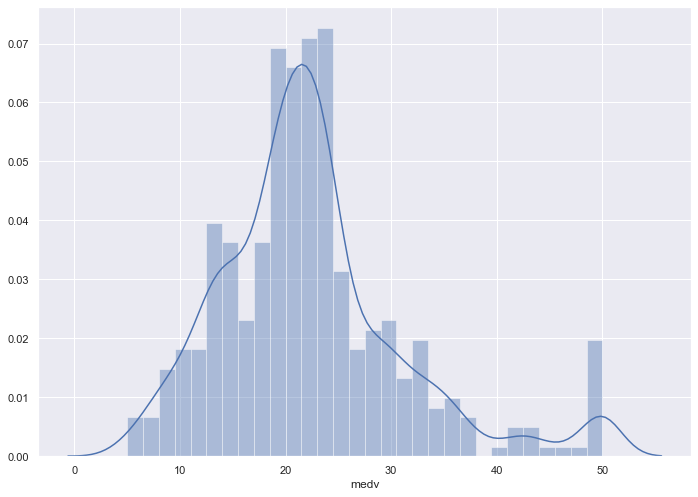

In [6]:
###plot the distribution of the target variable MEDV

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['medv'], bins=30)
plt.show()

<IPython.core.display.Javascript object>

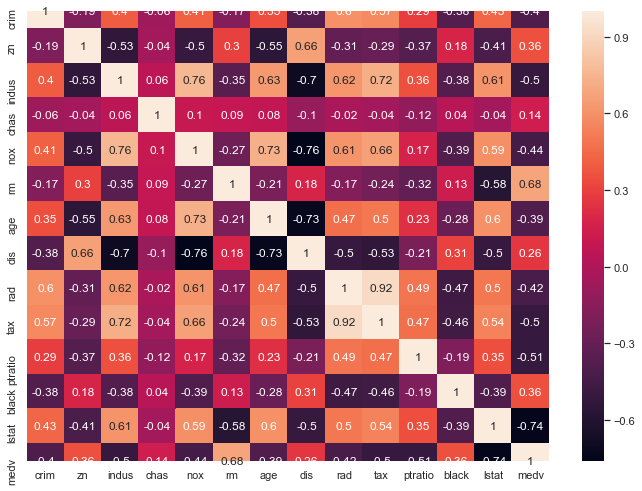

In [7]:
###creating a correlation matrix that measures the linear relationships between the variables

correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

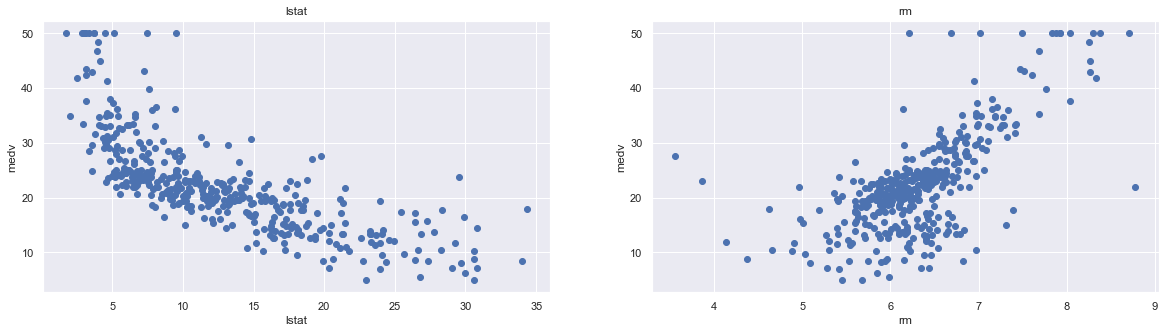

In [8]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [9]:
# concate lsat and rm columns
X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
Y = df['medv']

In [10]:
## slpitting data set into test and trining data at 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(323, 2)
(81, 2)
(323,)
(81,)


# Training and testing the model with linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# model evaluation

In [25]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
from sklearn.metrics import r2_score 
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.264771833479048
R2 score is 0.6575613099368793


The model performance for testing set
--------------------------------------
RMSE is 5.161544260233506
R2 score is 0.5906736510297403


 # evaluate an ridge regression model on the dataset

In [28]:

from numpy import mean
# define model
model = Ridge(alpha=1.0)
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.851 (0.435)
